In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
df = pd.read_csv("C:/Users/Στέφανος/Desktop/IBM/IBM.csv",sep=",")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.867095,288000
1,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.848488,256000
2,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.812086,363200
3,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.778110,544000
4,1962-01-09,7.360000,7.506667,7.360000,7.413333,1.799143,491200


In [3]:
df["Day_Var"] = ((df["Open"] - df["Close"]) / df["Open"])* 100


In [4]:
writer = pd.ExcelWriter('New Data.xlsx')
df.to_excel(writer, sheet_name = 'Day Var' , index = False)
writer.save()

pd.read_excel('New Data.xlsx', index_col=0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Day_Var
0,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.867095,288000,-0.874117
1,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.848488,256000,0.996525
2,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.812086,363200,1.840491
3,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.778110,544000,1.787306
4,1962-01-09,7.360000,7.506667,7.360000,7.413333,1.799143,491200,-0.724633


In [5]:
date = df['Date'].count()
date


14836

In [6]:
day_var = df['Day_Var']
day_var


0       -0.874117
1        0.996525
2        1.840491
3        1.787306
4       -0.724633
           ...   
14831   -1.440786
14832    0.442979
14833   -2.605466
14834    1.415132
14835   -0.311203
Name: Day_Var, Length: 14836, dtype: float64

<IPython.core.display.Javascript object>


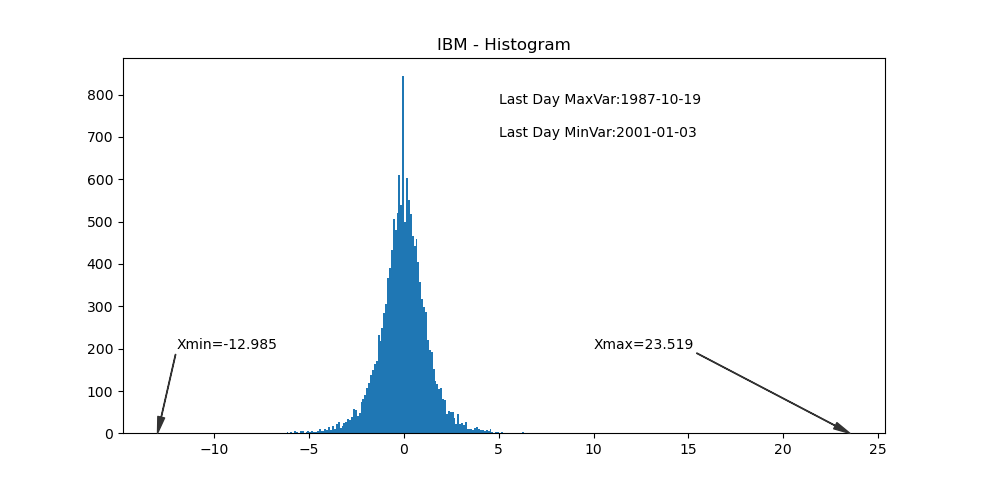

In [7]:

# Υπολογίζουμε την μέγιστη και ελάσχιστη τιμή του df["Day_Var"]
xmax = df["Day_Var"].max()
xmin = df["Day_Var"].min()

# Υπολογίζουμε τον αριθμό bins που θέλουμε να διαμερίσουμε τα δεδομένα μας
bins = (df['Day_Var'].max() - df['Day_Var'].min()) * 10
bins = int(bins)

# Εντοπίζουμε την τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση
max_day = df.iloc[df['Day_Var'].argmax()]
min_day = df.iloc[df['Day_Var'].argmin()]
# print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :{max_day}')
# print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :{min_day}')
%matplotlib notebook
# Τίτλος Xmin - Xmax στο γράφημα  
plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=(10, 200), fontsize=10,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=(-12, 200), fontsize=10,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

    
# Τίτλος Ημερομηνίας στο γράφημα    
max_day = list(df.iloc[df['Day_Var'].argmax()])
min_day = list(df.iloc[df['Day_Var'].argmin()])
plt.text(5,700,"Last Day MaxVar:" + max_day[0] +"\n" + "\nLast Day MinVar:"+ min_day[0],fontsize=10)

# Plotting Histogram

plt.title("IBM - Histogram")
plt.hist((day_var),bins=bins)
plt.show()


<IPython.core.display.Javascript object>


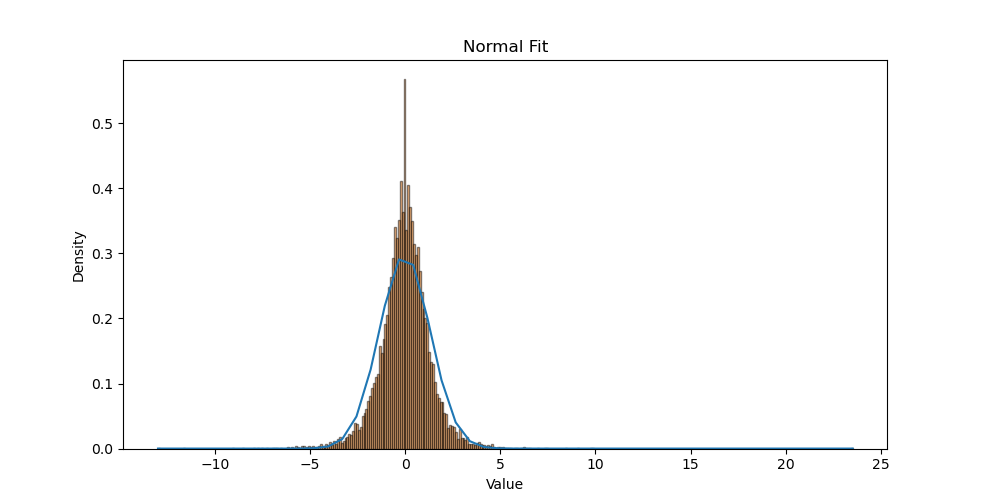

In [8]:
%matplotlib notebook
# Υπολογσιμός Standard Deviation & Mean
std = np.std(df['Day_Var'],ddof=1)
mean = np.mean(df['Day_Var'])


# Plotting Normal Distribution and Histogram

domain = np.linspace(np.min(df['Day_Var']),np.max(df['Day_Var']))
plt.plot(domain,norm.pdf(domain,mean,std),
        label = '$\mathcal{N}$ ' + f'$( \mu  \\approx {round(mean)} , \sigma  \\approx {round(std)} )$')
plt.hist(df['Day_Var'], edgecolor = 'black',alpha=0.5,bins=bins, density=True)
plt.title("Normal Fit")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


In [9]:
'''
Ερώτημα 5
'''
  
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

start = datetime.datetime(1980,1,1)
stop = datetime.datetime(2020,1,1)

print("\n---------------------------------------------\n\
*** Please fill find below IBM or S&P 500 Stock Rates {1980 - 2020}\
\n---------------------------------------------\n ")

print("\n For IBM Rates please write : IBM\n For S&P500 Rates please write : SPY")

Stock_name = input("\n\n--> Insert a Stock - Name :")

print("\n---------------------------------------------\n\
*** Please wait few sec for the downloading of the data\
\n---------------------------------------------\n ")

while Stock_name != 'IBM'and Stock_name != 'SPY' :
    Stock_name = input("Insert a stock :")

if  Stock_name == 'IBM':
   
    df1 = web.DataReader("IBM",'yahoo',start,stop)
    df1.to_csv('IBM - Rates.csv')
    print("\n------- IBM - Rates.csv has been downloaded correctly ! -------")
    
     
        
    df1 = pd.read_csv('IBM - Rates.csv',sep=",")
    df1.head() 
    
    
        

    df1["Day_Var"] = ((df1["Open"] - df1["Close"]) / df1["Open"])* 100

    writer = pd.ExcelWriter('New Data IBM.xlsx')
    df1.to_excel(writer, sheet_name = 'Day Var' , index = False)
    writer.save()    
     
    pd.read_excel('New Data IBM.xlsx', index_col=0)
    df1.head()

elif  Stock_name == 'SPY':
   
    df1 = web.DataReader("SPY",'yahoo',start,stop)
    df1.to_csv('SPY - Rates.csv')
    print("\n SPY - Rates.csv has been downloaded correctly !!!")
    
     
        
    df1 = pd.read_csv('SPY - Rates.csv',sep=",")
    df1.head() 
    
    
        
    df1["Day_Var"] = ((df1["Open"] - df1["Close"]) / df1["Open"])* 100
    

    writer = pd.ExcelWriter('New Data SPY.xlsx')
    df1.to_excel(writer, sheet_name = 'Day Var' , index = False)
    writer.save()    
     
    pd.read_excel('New Data SPY.xlsx', index_col=0)
    df1.head()


---------------------------------------------
*** Please fill find below IBM or S&P 500 Stock Rates {1980 - 2020}
---------------------------------------------
 

 For IBM Rates please write : IBM
 For S&P500 Rates please write : SPY


--> Insert a Stock - Name :SPY

---------------------------------------------
*** Please wait few sec for the downloading of the data
---------------------------------------------
 

 SPY - Rates.csv has been downloaded correctly !!!


<IPython.core.display.Javascript object>


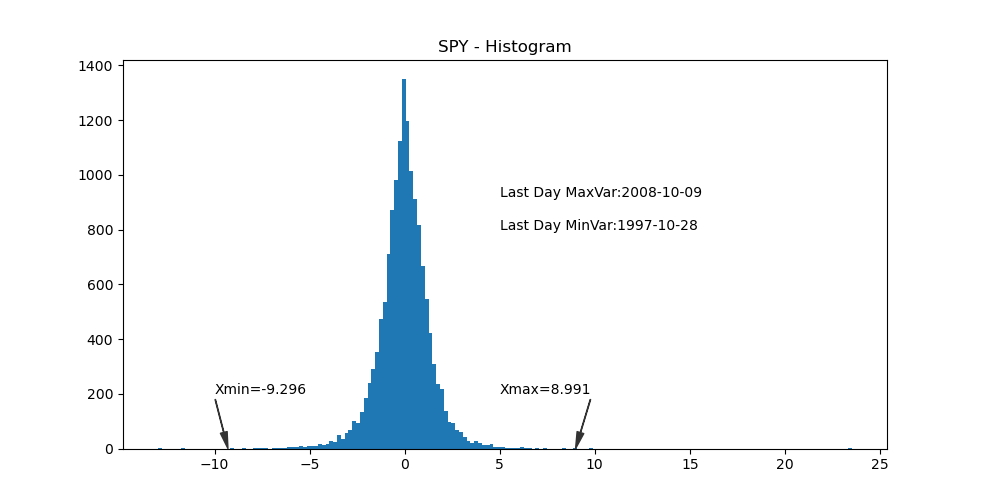

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 5.000e+00,
        6.000e+00, 9.000e+00, 5.000e+00, 1.000e+01, 8.000e+00, 1.000e+01,
        1.500e+01, 1.300e+01, 1.500e+01, 2.900e+01, 2.400e+01, 4.800e+01,
        3.400e+01, 5.600e+01, 6.700e+01, 1.020e+02, 9.200e+01, 1.330e+02,
        1.840e+02, 2.380e+02, 2.920e+02, 3.520e+02, 4.740e+02, 5.370e+02,
        7.120e+02, 8.700e+02, 9.810e+02, 1.125e+03, 1.350e+03, 1.198e+03,
        1.014e+03, 9.130e+02, 8.160e+02, 6.680e+02, 5.470e+02, 4.220e+02,
        3.090e+02, 2.350e+02, 2.160e+02, 1.360e+02, 9.800e+01, 9.500e+01,
        6.900e+01, 6.200e+01, 4.200e+0

In [10]:
if Stock_name == "IBM":
    x1 = (10,200)
    x2 = (-12,200)
    z1 = 5
    z2 = 400                
elif Stock_name == "SPY":
    x1 = (5,200)
    x2 = (-10,200)
    z1 = 5
    z2 = 800

   
  
# Υπολογίζουμε την μέγιστη και ελάσχιστη τιμή του df["Day_Var"]
xmax = df1["Day_Var"].max()
xmin = df1["Day_Var"].min()

# Υπολογίζουμε τον αριθμό bins που θέλουμε να διαμερίσουμε τα δεδομένα μας
bins = (df1['Day_Var'].max() - df1['Day_Var'].min()) * 10
bins = int(bins)

# Εντοπίζουμε την τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση
max_day = df1.iloc[df1['Day_Var'].argmax()]
min_day = df1.iloc[df1['Day_Var'].argmin()]
#print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :{max_day}')
#print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :{min_day}')
%matplotlib notebook 
# Τίτλος Xmin - Xmax στο γράφημα  
plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=x1, fontsize=10,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=x2, fontsize=10,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

    
# Τίτλος Ημερομηνίας στο γράφημα    
max_day = list(df1.iloc[df1['Day_Var'].argmax()])
min_day = list(df1.iloc[df1['Day_Var'].argmin()])
plt.text(z1,z2,"Last Day MaxVar:" + max_day[0] +"\n" + "\nLast Day MinVar:"+ min_day[0],fontsize=10)

 
# Plotting Histogram
plt.title(f'{Stock_name}' + " - Histogram")
plt.hist(df['Day_Var'],bins=bins)


<IPython.core.display.Javascript object>


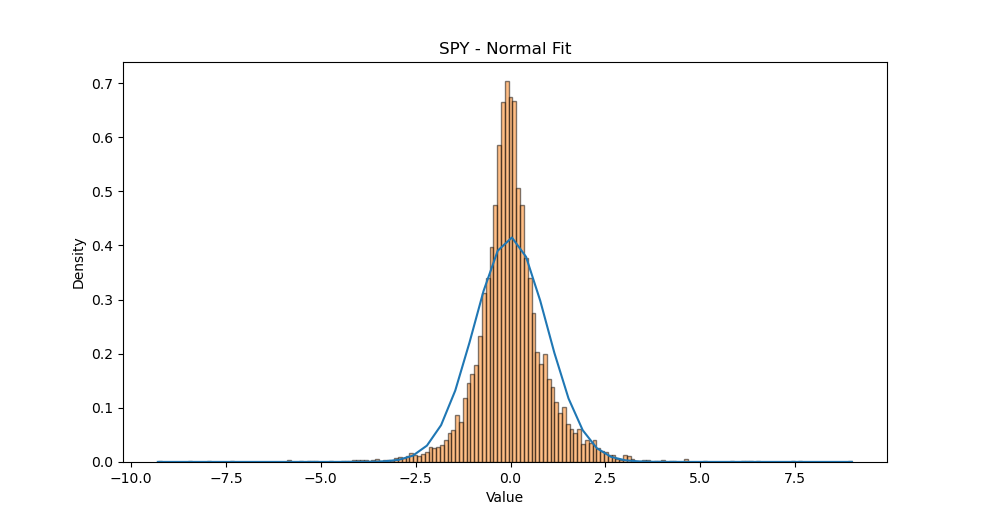

In [11]:
%matplotlib notebook
# Υπολογσιμός Standard Deviation & Mean
std = np.std(df1['Day_Var'],ddof=1)
mean = np.mean(df1['Day_Var'])


# Plotting Normal Distribution and Histogram

domain = np.linspace(np.min(df1['Day_Var']),np.max(df1['Day_Var']))
plt.plot(domain,norm.pdf(domain,mean,std),
        label = '$\mathcal{N}$ ' + f'$( \mu  \\approx {round((mean),5)} , \sigma  \\approx {round((std),5)} )$')
plt.hist(df1['Day_Var'], edgecolor = 'black',alpha=0.5,bins=bins, density=True)
plt.title(f'{Stock_name}' + " - Normal Fit")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()
